performance for counting records where Average_Supplier_Medicare_Payment_Amount > 100 in /mnt/silver/Medicare_DME_DS

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import time

# Ensure Spark session is active
spark = SparkSession.builder.getOrCreate()


In [0]:
data = spark.read.parquet("/mnt/silver/Medicare_DME_DS")

In [0]:
start_rdd = time.time()

rdd = data.rdd
count_rdd = rdd.filter(
    lambda row: row['Average_Supplier_Medicare_Payment_Amount'] is not None and 
                row['Average_Supplier_Medicare_Payment_Amount'] > 100
).count()

end_rdd = time.time()
rdd_time = end_rdd - start_rdd

print(f"RDD Count: {count_rdd}, Time: {rdd_time:.4f} seconds")


RDD Count: 134086, Time: 16.3663 seconds


In [0]:
start_df = time.time()

count_df = data.filter(col("Average_Supplier_Medicare_Payment_Amount") > 100).count()

end_df = time.time()
df_time = end_df - start_df

print(f"DataFrame Count: {count_df}, Time: {df_time:.4f} seconds")


DataFrame Count: 134086, Time: 1.0356 seconds


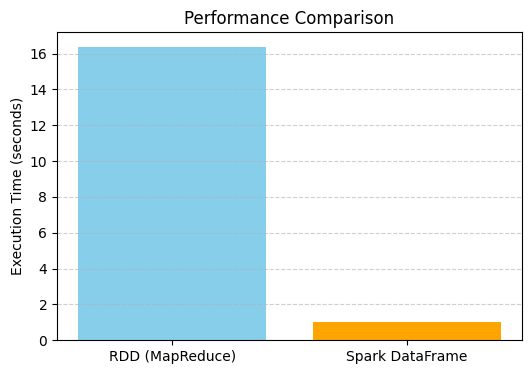

In [0]:
import matplotlib.pyplot as plt

# Labels and timing
methods = ['RDD (MapReduce)', 'Spark DataFrame']
times = [rdd_time, df_time]

plt.figure(figsize=(6,4))
plt.bar(methods, times, color=['skyblue', 'orange'])
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


In [0]:
perf_data = spark.createDataFrame([
    ("RDD (MapReduce)", count_rdd, rdd_time),
    ("Spark DataFrame", count_df, df_time)
], ["Method", "Record Count", "Time (seconds)"])

display(perf_data)


Method,Record Count,Time (seconds)
RDD (MapReduce),134086,16.36628246307373
Spark DataFrame,134086,1.0355596542358398
